### Implementing SVM

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

### Performing EDA

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,1316,1316,1316,1316,1316,1316,1316,1316
1,684,684,684,684,684,684,684,684


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Separate X and y values
X = data.drop('Outcome',axis=1).values
y = data.iloc[:,-1].values

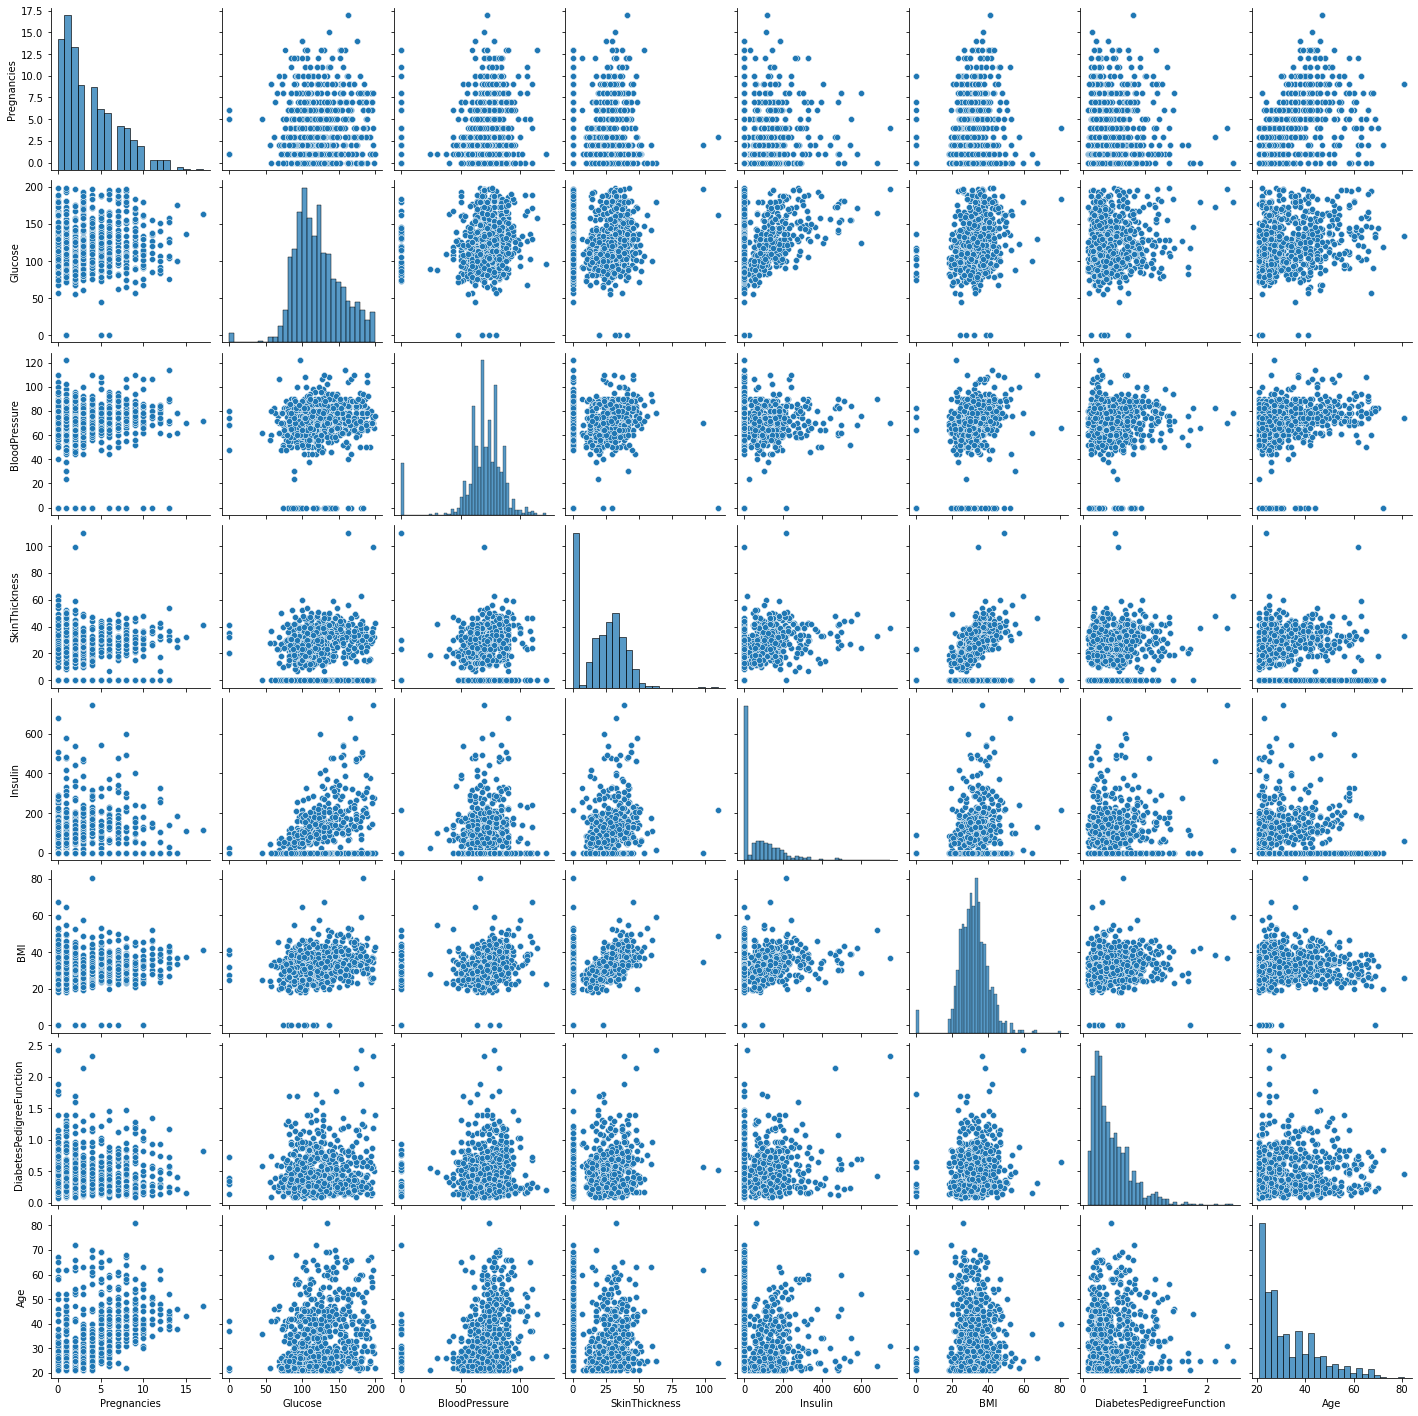

In [7]:
import seaborn as sns
sns.pairplot(data.iloc[:,:-1])

In [8]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Model building


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


### Model Evaluation

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
cfm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       397
           1       0.73      0.55      0.63       203

    accuracy                           0.78       600
   macro avg       0.76      0.72      0.73       600
weighted avg       0.77      0.78      0.77       600



In [17]:
accuracy_score(y_test,y_pred)

0.7783333333333333

### SVM(Support Vector Model)

In [18]:
from sklearn import svm

#Create a Classifier
clf = svm.SVC(kernel = 'linear')
#linear kernel

#Train the model using the training sets
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics

#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.785
